# Lista 09 - Pre-processamento

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns

In [3]:
df = pd.read_csv('adult.data.csv', header=None, sep=',\s+', engine='python', na_values=["?"])
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['income'].values)
y

array([0, 0, 0, ..., 0, 0, 1])

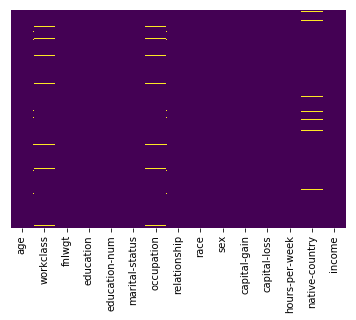

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.drop('education', inplace=True, axis=1)
df.drop('native-country', inplace=True, axis=1)
df.drop('income', inplace=True, axis=1)

In [9]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40


In [10]:
new = pd.get_dummies(df[['marital-status', 'relationship', 'race', 'sex']], drop_first=True)

In [11]:
df = pd.concat([df,new], axis=1)

In [12]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,1,0,0,0,0,0,0,0,1,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,0,0,0,0,0,1,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,1,0,0,0,0,0,0,0,1,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,0,0,0,0,0,1,0,0,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,0,0,1,0,1,0,0,0


In [13]:
df.drop(['marital-status', 'relationship', 'race', 'sex'], axis=1, inplace=True)

In [14]:
df.head()

,age,workclass,fnlwgt,education-num,occupation,capital-gain,capital-loss,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,State-gov,77516,13,Adm-clerical,2174,0,40,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,Self-emp-not-inc,83311,13,Exec-managerial,0,0,13,0,1,...,0,0,0,0,0,0,0,0,1,1
2,38,Private,215646,9,Handlers-cleaners,0,0,40,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,Private,234721,7,Handlers-cleaners,0,0,40,0,1,...,0,0,0,0,0,0,1,0,0,1
4,28,Private,338409,13,Prof-specialty,0,0,40,0,1,...,0,0,0,0,1,0,1,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 24 columns):
age                                     32561 non-null int64
workclass                               30725 non-null object
fnlwgt                                  32561 non-null int64
education-num                           32561 non-null int64
occupation                              30718 non-null object
capital-gain                            32561 non-null int64
capital-loss                            32561 non-null int64
hours-per-week                          32561 non-null int64
marital-status_Married-AF-spouse        32561 non-null uint8
marital-status_Married-civ-spouse       32561 non-null uint8
marital-status_Married-spouse-absent    32561 non-null uint8
marital-status_Never-married            32561 non-null uint8
marital-status_Separated                32561 non-null uint8
marital-status_Widowed                  32561 non-null uint8
relationship_Not-in-family         

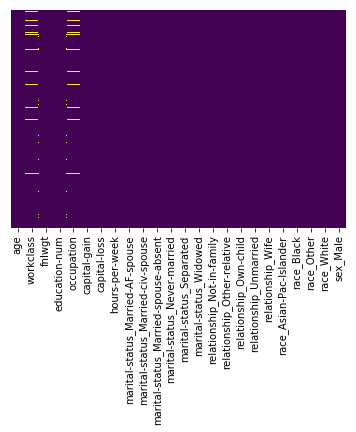

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
workclass = df['workclass'].value_counts().index[0] 
print("Categoria mais frequente em Workclass:", workclass)
occupation = df['occupation'].value_counts().index[0] 
print("Categoria mais frequente em Occupation:", occupation)

Categoria mais frequente em Workclass: Private
Categoria mais frequente em Occupation: Prof-specialty


In [19]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [20]:
df.head()

,age,workclass,fnlwgt,education-num,occupation,capital-gain,capital-loss,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,State-gov,77516,13,Adm-clerical,2174,0,40,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,Self-emp-not-inc,83311,13,Exec-managerial,0,0,13,0,1,...,0,0,0,0,0,0,0,0,1,1
2,38,Private,215646,9,Handlers-cleaners,0,0,40,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,Private,234721,7,Handlers-cleaners,0,0,40,0,1,...,0,0,0,0,0,0,1,0,0,1
4,28,Private,338409,13,Prof-specialty,0,0,40,0,1,...,0,0,0,0,1,0,1,0,0,0


In [21]:
final = pd.get_dummies(df[['workclass', 'occupation']], drop_first=True)

In [22]:
df = pd.concat([df,final], axis=1)

In [23]:
df.drop(['workclass', 'occupation'], axis=1, inplace=True)

In [24]:
X = df.values

In [25]:
X

array([[    39,  77516,     13, ...,      0,      0,      0],
       [    50,  83311,     13, ...,      0,      0,      0],
       [    38, 215646,      9, ...,      0,      0,      0],
       ...,
       [    58, 151910,      9, ...,      0,      0,      0],
       [    22, 201490,      9, ...,      0,      0,      0],
       [    52, 287927,      9, ...,      0,      0,      0]])

COMPARAÇÃO DOS MODELOS

In [26]:
lr_acc = []
knn_acc = []
nb_acc = []
svm_acc = []
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
for train_index, test_index in kfold.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    std_scale = StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    
    #Logistic Regression
    lr = LogisticRegression(n_jobs=-1)
    lr.fit(X_train_std, y_train)
    lr_pred = lr.predict(X_test_std)
    lr_acc.append(accuracy_score(y_test, lr_pred))
    
    #kNN
    knn = KNeighborsClassifier(n_jobs=-1)
    knn.fit(X_train_std, y_train)
    knn_pred = knn.predict(X_test_std)
    knn_acc.append(accuracy_score(y_test, knn_pred))
    
    #Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train_std, y_train)
    nb_pred = nb.predict(X_test_std)
    nb_acc.append(accuracy_score(y_test, nb_pred))
    
    #SVM
    svm = SVC()
    svm.fit(X_train_std, y_train)
    svm_pred = svm.predict(X_test_std)
    svm_acc.append(accuracy_score(y_test, svm_pred))

/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [27]:
print("Acurácia Média da Logistic Regression", np.mean(lr_acc))
print("Acurácia Média da kNN", np.mean(knn_acc))
print("Acurácia Média da Naive Bayes", np.mean(nb_acc))
print("Acurácia Média da SVM", np.mean(svm_acc))

Acurácia Média da Logistic Regression 0.8491752414656606
Acurácia Média da kNN 0.8303185869802636
Acurácia Média da Naive Bayes 0.5447010486681145
Acurácia Média da SVM 0.8516322769316782


### MELHOR MODELO
- SVM: SVC

In [ ]:
std_scale = StandardScaler().fit(X)
X_std = std_scale.transform(X)
#SVM
svm_model = SVC()
svm_model.fit(X_std, y)

/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
